# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

Using TensorFlow backend.


## Options

In [13]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)
    train_feats = [var for x in train_feats for var in train_feats[x]]

In [14]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [15]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [16]:
train_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'train.hdf5', "r+"), rotate=False,
                             input_pipe=None, rot_mult=8)

Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


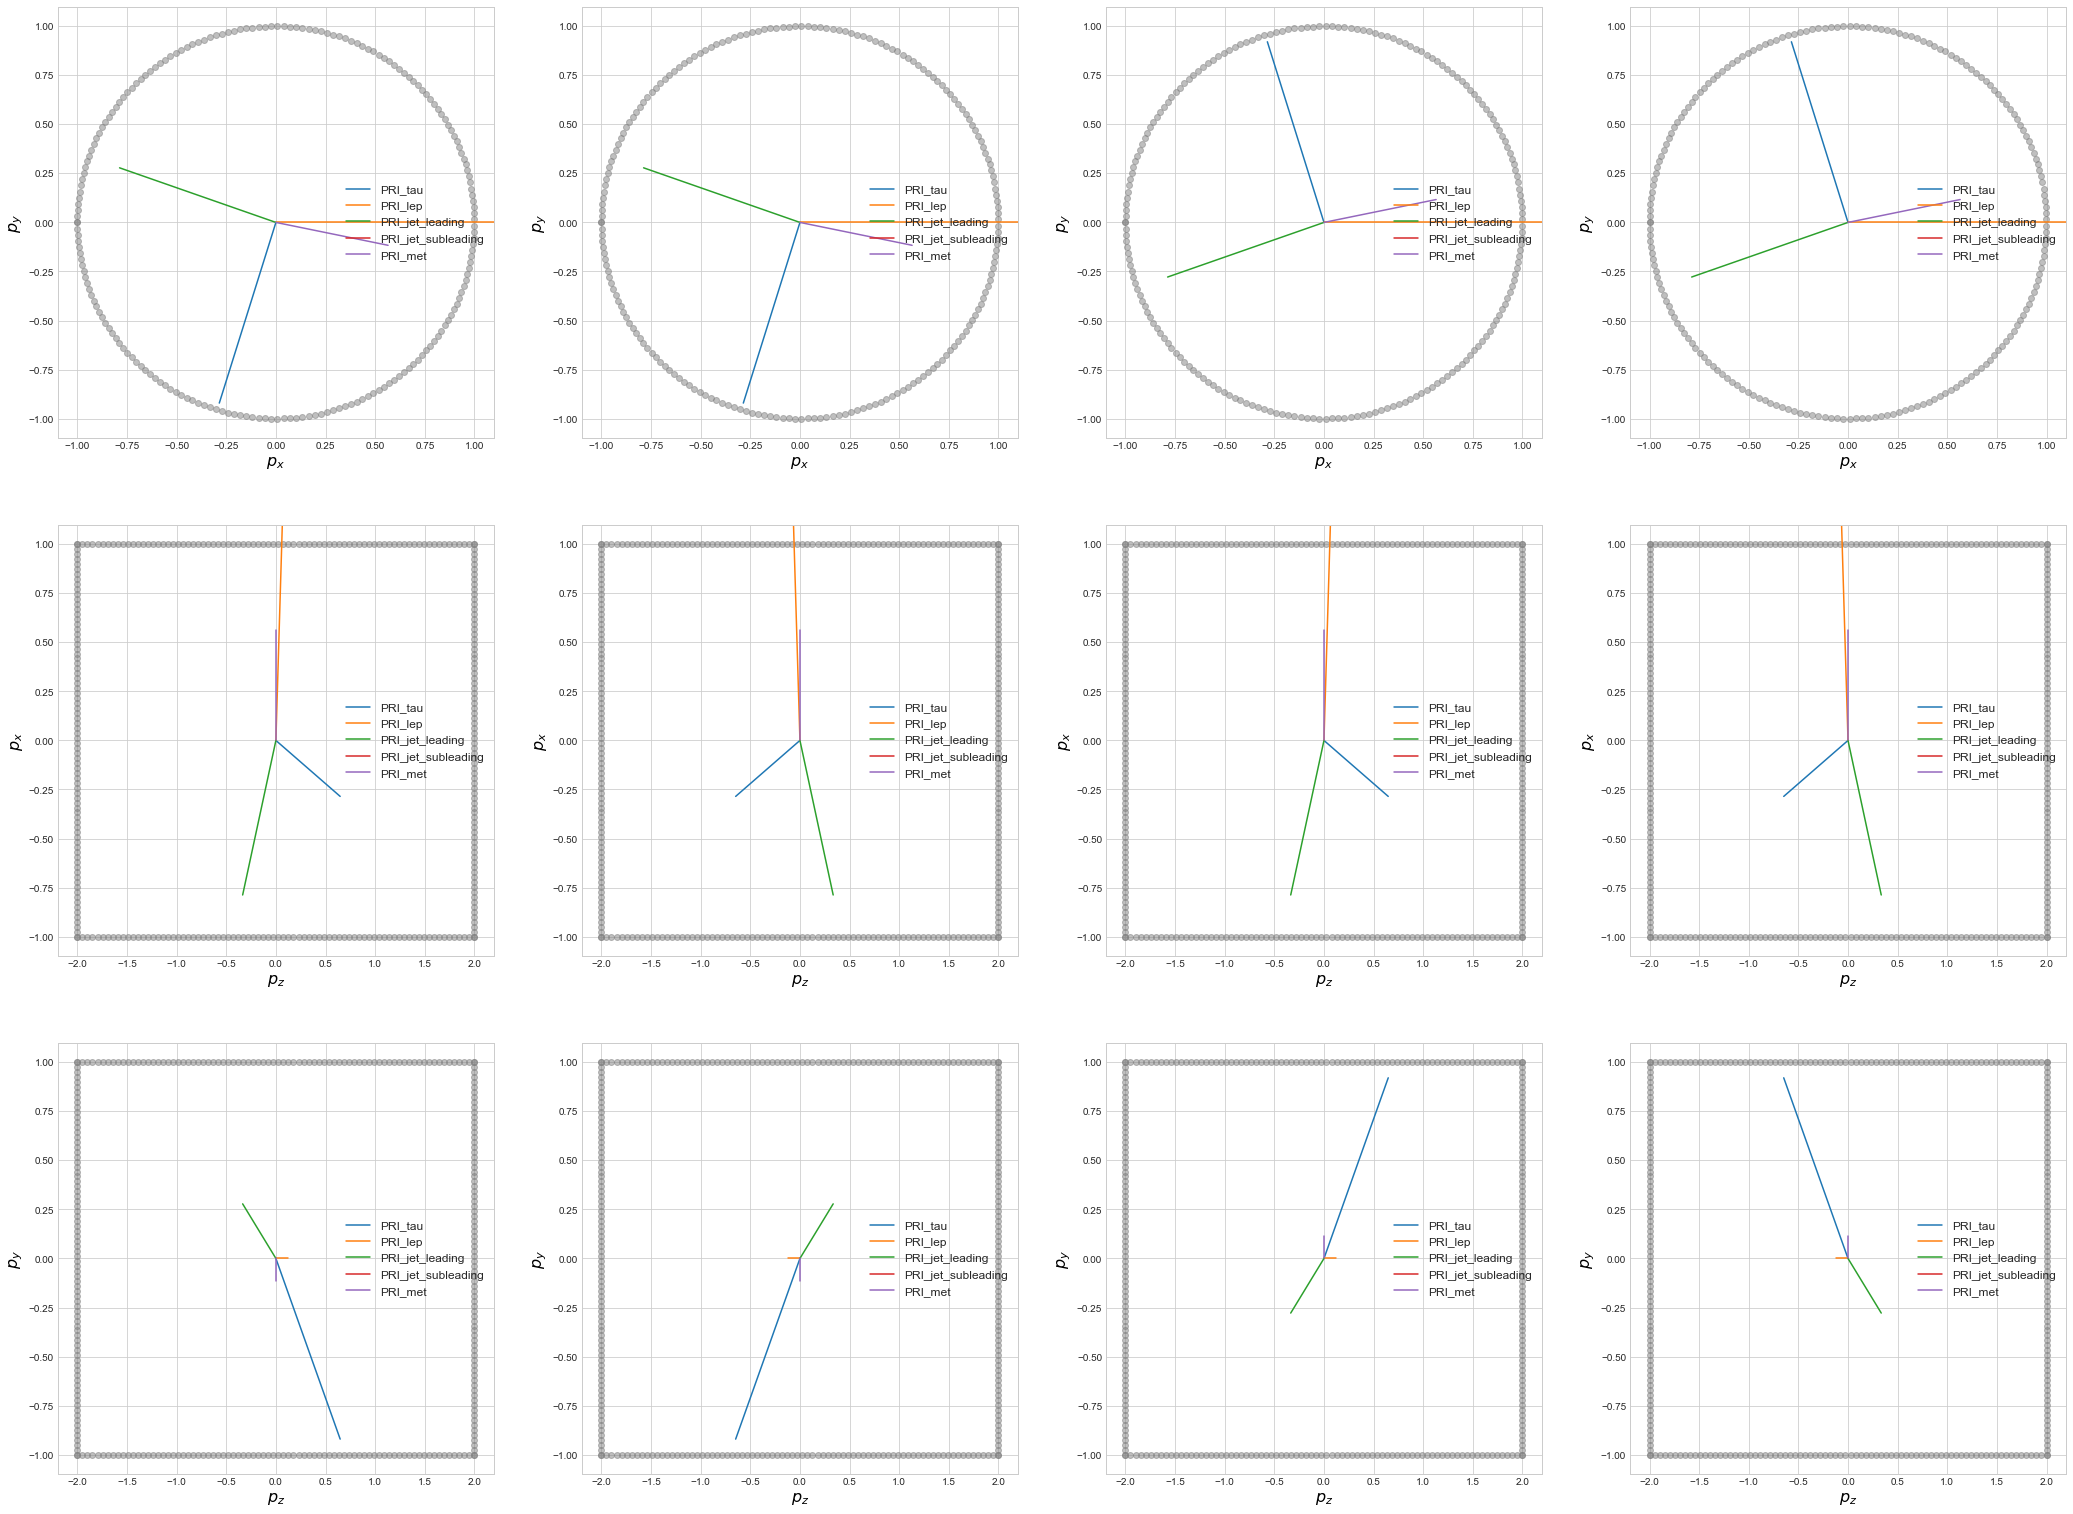

In [22]:
id=1
aug_ranges = [range(4)]
for aug_range in aug_ranges:
    comp_events([pd.DataFrame(train_fy.get_test_fold(0, i)['inputs'], columns=train_feats)[id:id+1] for i in aug_range])

## Determine LR

2 classes found, running in binary mode



/Users/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 11.081s 


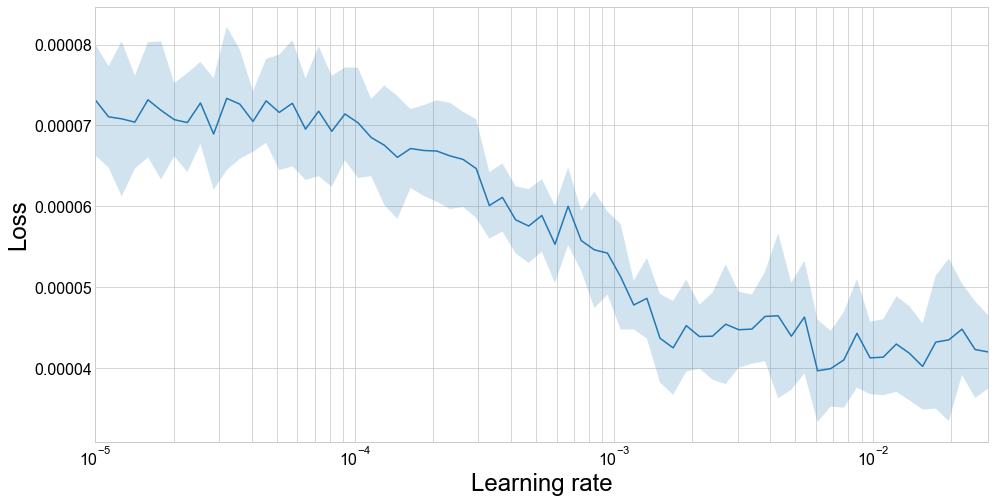

______________________________________



In [25]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [26]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode

1 New best found: 3.693723515463942e-05
2 New best found: 3.521119228046972e-05
3 New best found: 3.4652139913907255e-05
5 New best found: 3.4380190190910065e-05
6 New best found: 3.397127240564167e-05
7 New best found: 3.3736510701883286e-05
10 New best found: 3.352600055571002e-05
11 New best found: 3.32939501245484e-05
13 New best found: 3.3123527174608106e-05
14 New best found: 3.296954466351417e-05
25 New best found: 3.294240240163674e-05
27 New best found: 3.2645334825100103e-05
28 New best found: 3.2643152616862174e-05
29 New best found: 3.257935843128413e-05
30 New best found: 3.256296394345142e-05
31 New best found: 3.255294185273281e-05
50 New best found: 3.253658403325641e-05
52 New best found: 3.2410989653363155e-05
55 New best found: 3.240732666479321e-05
56 New best found: 3.2372652110351864e-05
57 New best found: 3.231129111835375e-05
58 New best found: 3.23032

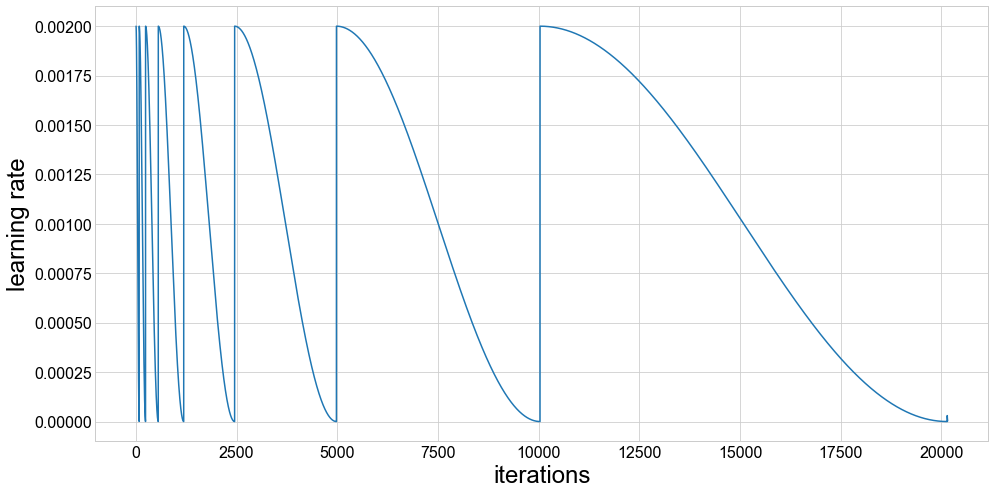

Fold took 129.514s

Training model 2 / 10
Using cosine LR annealing
1 New best found: 3.7608328427559505e-05
2 New best found: 3.5129766343860686e-05
3 New best found: 3.457816679494764e-05
5 New best found: 3.414360482686431e-05
6 New best found: 3.382848476969022e-05
7 New best found: 3.356165373809437e-05
10 New best found: 3.3292138884454155e-05
12 New best found: 3.3126918686970783e-05
13 New best found: 3.285276405013418e-05
14 New best found: 3.28316091243319e-05
15 New best found: 3.279149798833397e-05
23 New best found: 3.2725448193687644e-05
24 New best found: 3.270260177345829e-05
25 New best found: 3.2676448145443386e-05
27 New best found: 3.245540300308612e-05
28 New best found: 3.241838337450981e-05
29 New best found: 3.229315821549588e-05
31 New best found: 3.2292302994148016e-05
45 New best found: 3.2264255482462634e-05
49 New best found: 3.2178105995340125e-05
52 New best found: 3.209396293320544e-05
54 New best found: 3.2045963951895304e-05
56 New best found: 3.197675

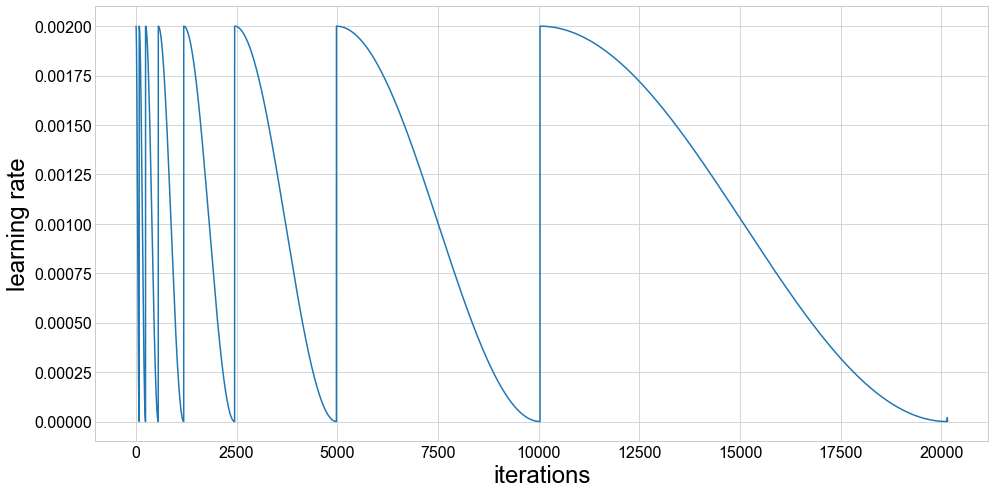

Fold took 131.978s

Training model 3 / 10
Using cosine LR annealing
1 New best found: 3.824497075820785e-05
2 New best found: 3.535784338109491e-05
3 New best found: 3.451318329554602e-05
5 New best found: 3.385124618665927e-05
6 New best found: 3.331205756179017e-05
7 New best found: 3.31639797544705e-05
12 New best found: 3.2667134523865345e-05
13 New best found: 3.248789107974535e-05
14 New best found: 3.243254435336143e-05
23 New best found: 3.234056133056728e-05
25 New best found: 3.231702234815415e-05
26 New best found: 3.191454956969879e-05
29 New best found: 3.188074085980031e-05
30 New best found: 3.187838548426565e-05
31 New best found: 3.1871450268962e-05
53 New best found: 3.1844455265620344e-05
54 New best found: 3.1730283482085777e-05
58 New best found: 3.167320482621086e-05
97 New best found: 3.1650740365924326e-05
103 New best found: 3.154360869141502e-05
107 New best found: 3.1518660408328784e-05
115 New best found: 3.147920767145788e-05
CosineAnneal stalling after 255

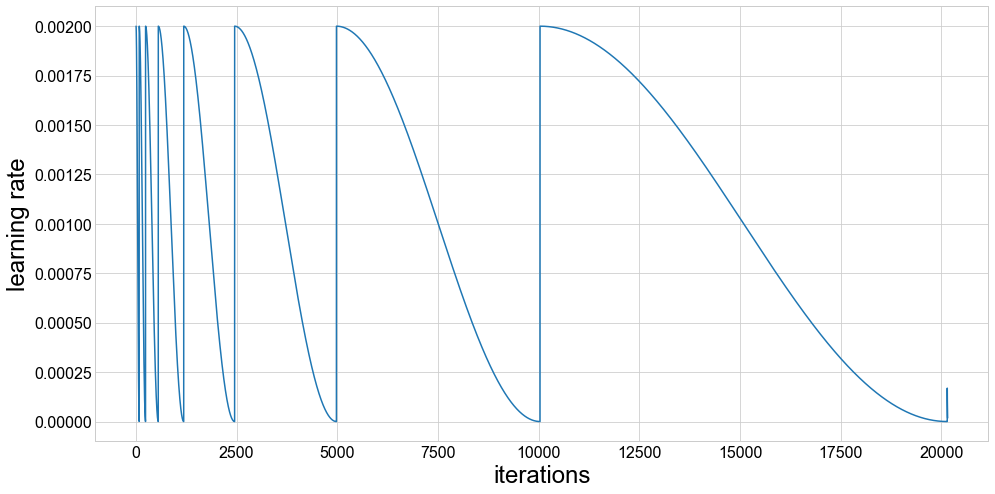

Fold took 134.640s

Training model 4 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101308). Check your callbacks.
  % delta_t_median)


1 New best found: 3.691590158996405e-05
2 New best found: 3.504406407300849e-05
3 New best found: 3.425396504753735e-05
4 New best found: 3.413030242518289e-05
5 New best found: 3.326556659740163e-05
6 New best found: 3.308958069537766e-05
7 New best found: 3.290710477886023e-05
11 New best found: 3.272628909326158e-05
12 New best found: 3.2362340277177284e-05
13 New best found: 3.228838661161717e-05
14 New best found: 3.217650279693771e-05
23 New best found: 3.21461238185293e-05
24 New best found: 3.196764037566027e-05
27 New best found: 3.178153812768869e-05
28 New best found: 3.175097787898267e-05
30 New best found: 3.17204635226517e-05
31 New best found: 3.1714306779031176e-05
47 New best found: 3.1686416077718606e-05
50 New best found: 3.1591869967815e-05
54 New best found: 3.155257386533776e-05
56 New best found: 3.152537403220777e-05
57 New best found: 3.1464165207580664e-05
58 New best found: 3.145214590476826e-05
59 New best found: 3.144792725361185e-05
60 New best found: 3.14

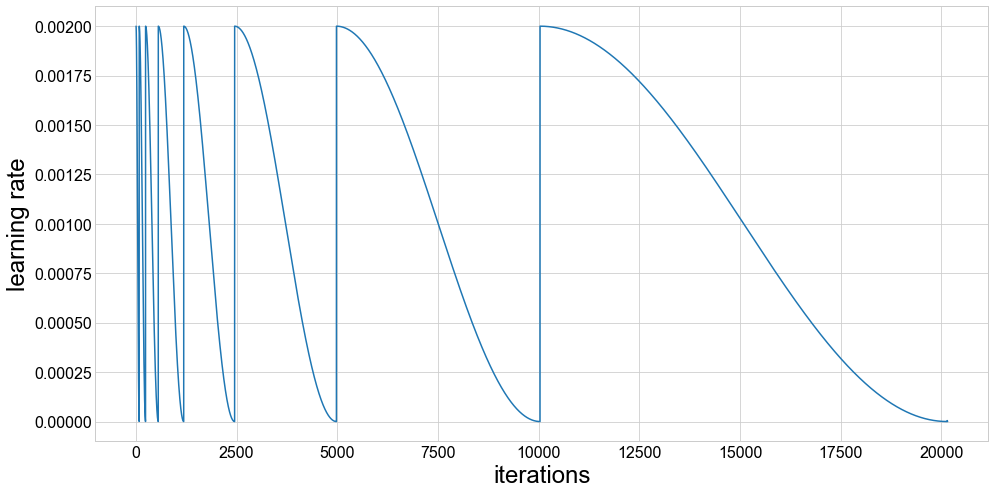

Fold took 139.967s

Training model 5 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110117). Check your callbacks.
  % delta_t_median)


1 New best found: 3.81234157102881e-05
2 New best found: 3.534678519063163e-05
3 New best found: 3.4560622871504165e-05
4 New best found: 3.414512468661996e-05
5 New best found: 3.388871599017875e-05
6 New best found: 3.294162966849399e-05
7 New best found: 3.284556536673335e-05
11 New best found: 3.276601070101606e-05
13 New best found: 3.230538215721026e-05
14 New best found: 3.229469206780777e-05
15 New best found: 3.222793912136694e-05
24 New best found: 3.1894935708260166e-05
26 New best found: 3.182827507116599e-05
28 New best found: 3.172935130933183e-05
29 New best found: 3.170281603306648e-05
30 New best found: 3.1671284639742226e-05
31 New best found: 3.16678010916803e-05
51 New best found: 3.1610846102557846e-05
52 New best found: 3.149978486180771e-05
53 New best found: 3.1457631821831454e-05
55 New best found: 3.1447333265532506e-05
56 New best found: 3.134921618184308e-05
58 New best found: 3.131474554393208e-05
61 New best found: 3.128887269849656e-05
62 New best found: 

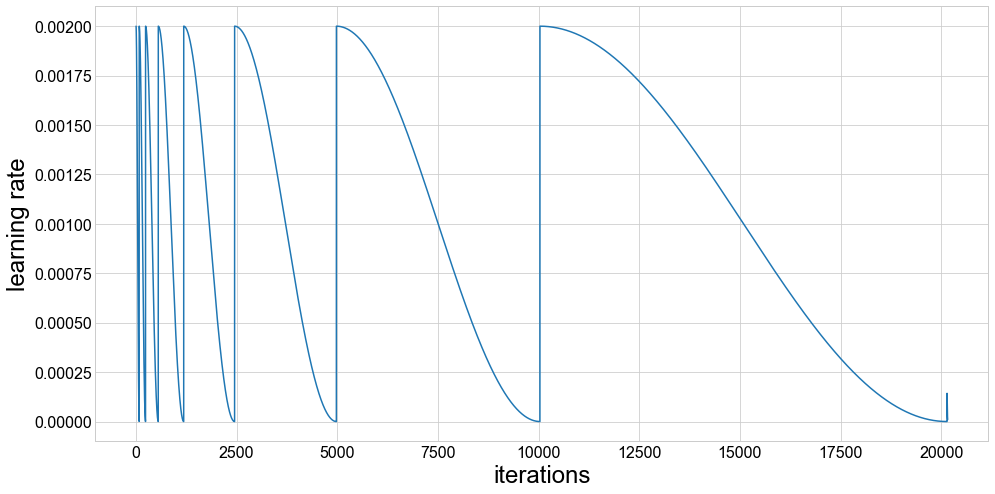

Fold took 145.899s

Training model 6 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112357). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8628231713889595e-05
2 New best found: 3.602919876432312e-05
3 New best found: 3.5399659509096204e-05
4 New best found: 3.4973058741036556e-05
5 New best found: 3.4137225518548e-05
6 New best found: 3.3846116856146254e-05
7 New best found: 3.379944731458023e-05
10 New best found: 3.353451640324614e-05
12 New best found: 3.348662687000712e-05
13 New best found: 3.325186280972937e-05
14 New best found: 3.30821023258896e-05
15 New best found: 3.305213661007994e-05
23 New best found: 3.302032157409832e-05
26 New best found: 3.28619821372071e-05
27 New best found: 3.279839681801269e-05
28 New best found: 3.271915006116873e-05
29 New best found: 3.268335626656836e-05
31 New best found: 3.268206077710401e-05
49 New best found: 3.2655718174699064e-05
51 New best found: 3.2571479348540486e-05
52 New best found: 3.256847987180126e-05
54 New best found: 3.249535050641814e-05
55 New best found: 3.2473312759294855e-05
58 New best found: 3.245185743609937e-05
59 New best found: 3

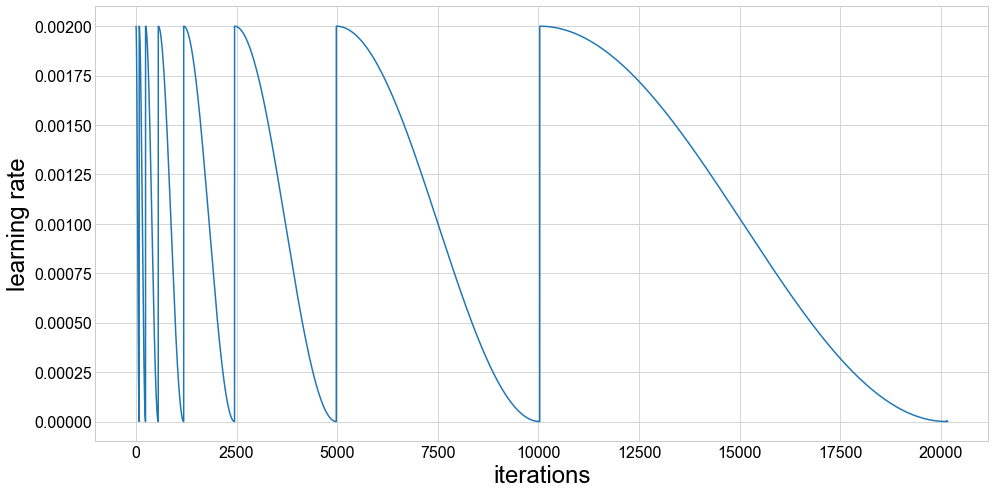

Fold took 157.600s

Training model 7 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138347). Check your callbacks.
  % delta_t_median)


1 New best found: 3.88835907826433e-05
2 New best found: 3.6091958609176796e-05
3 New best found: 3.5544951404153834e-05
5 New best found: 3.465752206393518e-05
6 New best found: 3.4135493217036126e-05
7 New best found: 3.396562399138929e-05
11 New best found: 3.377189369493863e-05
12 New best found: 3.325317155395169e-05
13 New best found: 3.315594337764196e-05
14 New best found: 3.297008988156449e-05
23 New best found: 3.279338835709495e-05
24 New best found: 3.2699004327878354e-05
26 New best found: 3.257717036321992e-05
28 New best found: 3.2448956798180004e-05
31 New best found: 3.2446533264010214e-05
48 New best found: 3.238079195289174e-05
52 New best found: 3.234599383285968e-05
53 New best found: 3.2296104389388346e-05
55 New best found: 3.224530385195976e-05
56 New best found: 3.2198119786335154e-05
57 New best found: 3.219433594495058e-05
58 New best found: 3.217310207837727e-05
59 New best found: 3.214352972645429e-05
60 New best found: 3.2133514543966156e-05
61 New best fo

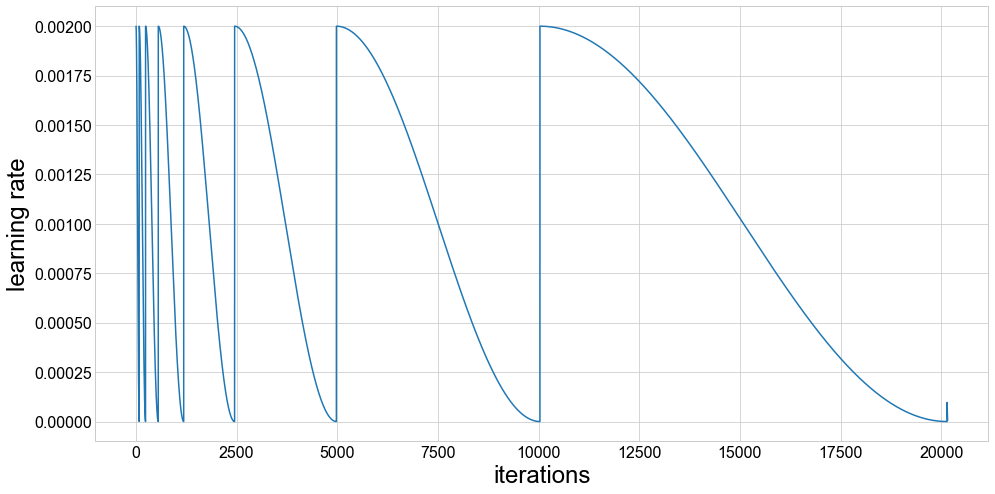

Fold took 159.707s

Training model 8 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.285136). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142877). Check your callbacks.
  % delta_t_median)


1 New best found: 3.6621983463585384e-05
2 New best found: 3.500103083262659e-05
3 New best found: 3.406688993971379e-05
4 New best found: 3.3900484024178326e-05
5 New best found: 3.3263897239967284e-05
6 New best found: 3.300910335624224e-05
7 New best found: 3.28800387833764e-05
9 New best found: 3.280118461443128e-05
10 New best found: 3.267530577644003e-05
11 New best found: 3.242983073287076e-05
12 New best found: 3.2206121664842436e-05
13 New best found: 3.218269195858837e-05
14 New best found: 3.196182041925548e-05
15 New best found: 3.196024170180761e-05
23 New best found: 3.185335864282986e-05
25 New best found: 3.175757776343839e-05
27 New best found: 3.156718722518282e-05
29 New best found: 3.1499929661319434e-05
30 New best found: 3.148160482371917e-05
46 New best found: 3.139128141824268e-05
53 New best found: 3.1367315385432376e-05
54 New best found: 3.1315246775100416e-05
55 New best found: 3.1245584600018645e-05
56 New best found: 3.119440543921437e-05
59 New best found

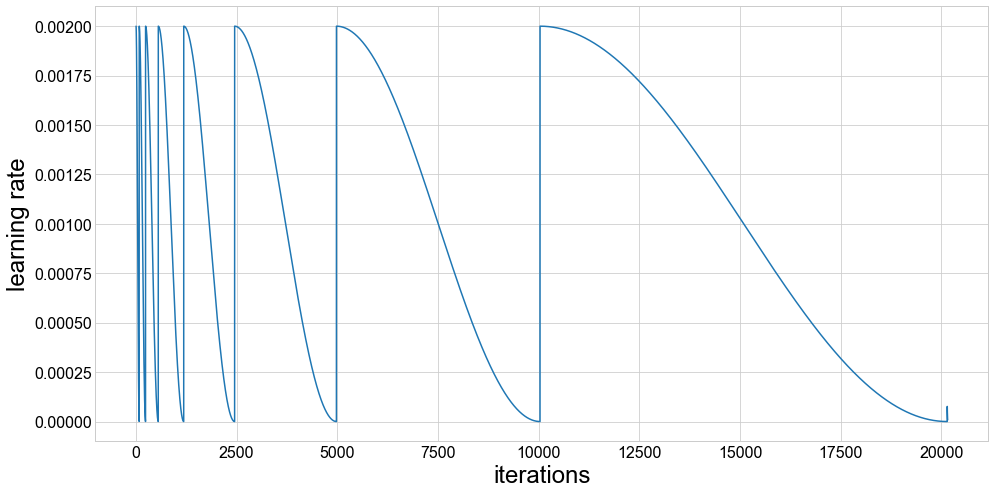

Fold took 152.524s

Training model 9 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.275158). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137849). Check your callbacks.
  % delta_t_median)


1 New best found: 3.786508413322735e-05
2 New best found: 3.5311453472240825e-05
3 New best found: 3.486644162185257e-05
5 New best found: 3.416044653131394e-05
6 New best found: 3.3574617066187787e-05
7 New best found: 3.3473057826631703e-05
11 New best found: 3.308232385461451e-05
13 New best found: 3.286855065234704e-05
15 New best found: 3.2773073778662365e-05
22 New best found: 3.264582534611691e-05
27 New best found: 3.255062969401479e-05
28 New best found: 3.245694807264954e-05
29 New best found: 3.245000246242853e-05
31 New best found: 3.2446607475867495e-05
47 New best found: 3.2434029468277e-05
48 New best found: 3.242412363688345e-05
49 New best found: 3.231060277612414e-05
53 New best found: 3.2266781824000646e-05
55 New best found: 3.219434646598529e-05
56 New best found: 3.213512552756583e-05
58 New best found: 3.211635151965311e-05
60 New best found: 3.207369429874234e-05
107 New best found: 3.205062192864716e-05
108 New best found: 3.195885457680561e-05
118 New best fou

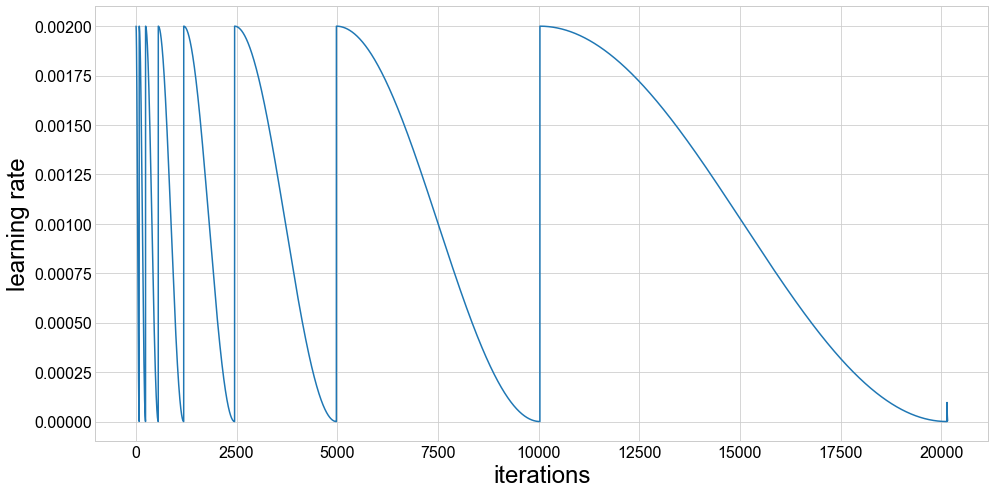

Fold took 158.917s

Training model 10 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.290850). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145724). Check your callbacks.
  % delta_t_median)


1 New best found: 3.6987003163810404e-05
2 New best found: 3.56120645212727e-05
3 New best found: 3.464587862534231e-05
4 New best found: 3.4410851621238215e-05
5 New best found: 3.3804750928688e-05
6 New best found: 3.34820662741008e-05
7 New best found: 3.3227842197681534e-05
11 New best found: 3.299342351234409e-05
12 New best found: 3.2684092540703576e-05
13 New best found: 3.2637583885162516e-05
14 New best found: 3.260329266452625e-05
24 New best found: 3.252627482300449e-05
25 New best found: 3.2521941307066984e-05
26 New best found: 3.229483609321498e-05
28 New best found: 3.2200297711199196e-05
30 New best found: 3.2194931222819156e-05
31 New best found: 3.21911776819355e-05
48 New best found: 3.2187066087252473e-05
51 New best found: 3.212614597309525e-05
52 New best found: 3.204116210025419e-05
54 New best found: 3.190415348600563e-05
55 New best found: 3.1836742092485963e-05
58 New best found: 3.1805209592413545e-05
106 New best found: 3.1790692079557785e-05
109 New best fo

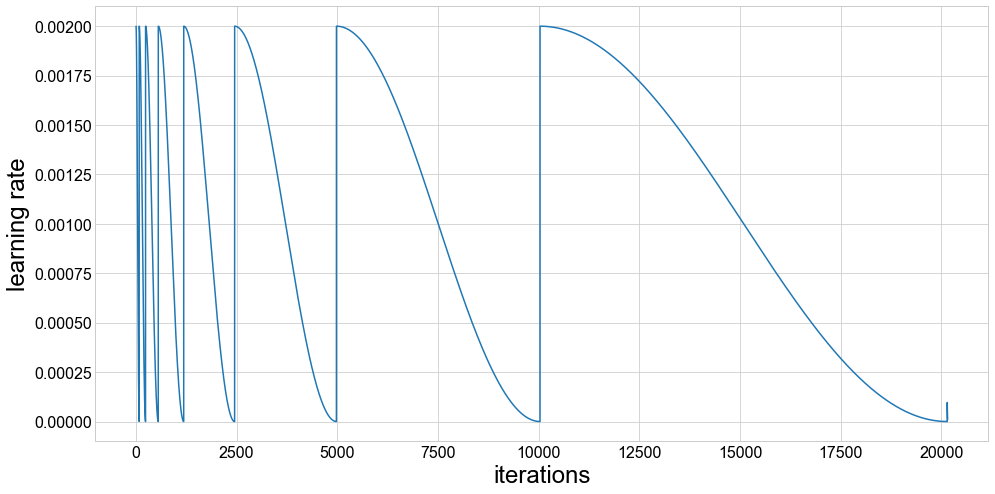

Fold took 157.911s


______________________________________
Training finished
Cross-validation took 1472.315s 


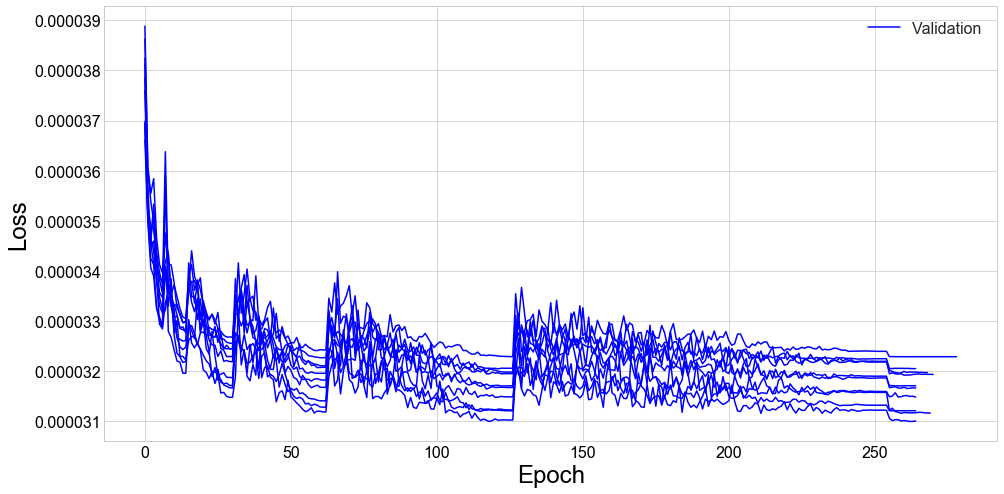

Mean loss = 3.16e-05 +- 1e-07
Mean wAUC = 0.0626 +- 0.0005
Mean AUC = 0.0974 +- 0.0004
Mean AMS = 3.94 +- 0.1
Mean cut = 0.951 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [27]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

## Construct ensemble

In [28]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

[autoreload of hepml_tools.general.callbacks failed: Traceback (most recent call last):
  File "/Users/giles/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/giles/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/giles/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/giles/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/User

In [29]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 7 with loss = 3.0998338799961505e-05
Model 1 is 4 with loss = 3.116092371710693e-05
Model 2 is 3 with loss = 3.121262312633917e-05
Model 3 is 2 with loss = 3.147920767145788e-05
Model 4 is 9 with loss = 3.1645607877461345e-05
Model 5 is 1 with loss = 3.170594549891328e-05
Model 6 is 8 with loss = 3.1923071356141006e-05
Model 7 is 6 with loss = 3.196543550511706e-05
Model 8 is 0 with loss = 3.204841901118222e-05
Model 9 is 5 with loss = 3.229069397555145e-05


## Response on validation data without TTA

In [30]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [31]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0012117214289999539s per sample

Predicting fold 2 out of 10
Prediction took 0.00019415062780026347s per sample

Predicting fold 3 out of 10
Prediction took 0.00020438898039974447s per sample

Predicting fold 4 out of 10
Prediction took 0.00020559060679988761s per sample

Predicting fold 5 out of 10
Prediction took 0.00020914768139991793s per sample

Predicting fold 6 out of 10
Prediction took 0.00020159428179977113s per sample

Predicting fold 7 out of 10
Prediction took 0.00022953425659979985s per sample

Predicting fold 8 out of 10
Prediction took 0.0002024258926001494s per sample

Predicting fold 9 out of 10
Prediction took 0.00021231475519998638s per sample

Predicting fold 10 out of 10
Prediction took 0.00019946461180006737s per sample



In [32]:
val_df = convert_to_df(val_fy.source)

50000 candidates loaded


In [33]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

Testing ROC AUC: unweighted 0.9039525803844696, weighted 0.9363543902090647


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Best cut at 0.9654449874216372 corresponds to AMS of 3.968734422088166
Maximum AMS for data is 3.99428605551135 at cut of 0.9647577404975891
CPU times: user 12.9 s, sys: 19.4 ms, total: 12.9 s
Wall time: 12.9 s


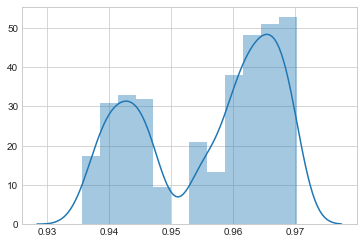

In [34]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.9560174 corresponds to AMS of 3.80115266516426
Maximum AMS for data is 3.99428605551135 at cut of 0.9647577404975891
CPU times: user 98 ms, sys: 12.4 ms, total: 110 ms
Wall time: 46.6 ms


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


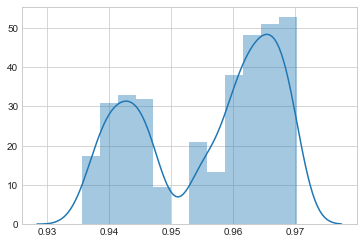

In [35]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

## Response on validation data with TTA

In [36]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rotate=False,
                             input_pipe=None, rot_mult=8)

Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


In [37]:
fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0008158214030001545s per sample

Predicting fold 2 out of 10
Prediction took 0.0007932916875997762s per sample

Predicting fold 3 out of 10
Prediction took 0.0008076868785999977s per sample

Predicting fold 4 out of 10
Prediction took 0.0008076110794001579s per sample

Predicting fold 5 out of 10
Prediction took 0.000816804036800022s per sample

Predicting fold 6 out of 10
Prediction took 0.0008382777532002365s per sample

Predicting fold 7 out of 10
Prediction took 0.0008830144310002652s per sample

Predicting fold 8 out of 10
Prediction took 0.0008374463591997482s per sample

Predicting fold 9 out of 10
Prediction took 0.0008289861924000434s per sample

Predicting fold 10 out of 10
Prediction took 0.0008312463612001011s per sample



In [38]:
val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')

50000 candidates loaded


In [39]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class),
                                                           roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class, sample_weight=val_df_tta.gen_weight)))

Testing ROC AUC: unweighted 0.904020570390617, weighted 0.9363728998384626


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Best cut at 0.9655407608092368 corresponds to AMS of 3.9504033219564074
Maximum AMS for data is 3.9715518051029735 at cut of 0.9645465612411499
CPU times: user 13 s, sys: 29.5 ms, total: 13 s
Wall time: 13 s


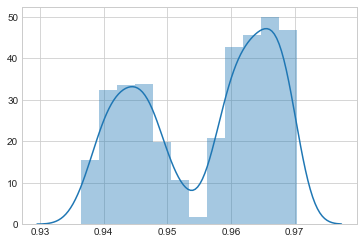

In [40]:
%%time
cut_kde_tta = kde_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.9559084 corresponds to AMS of 3.7742823687021443
Maximum AMS for data is 3.9715518051029735 at cut of 0.9645465612411499
CPU times: user 93.8 ms, sys: 10.7 ms, total: 104 ms
Wall time: 45.1 ms


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


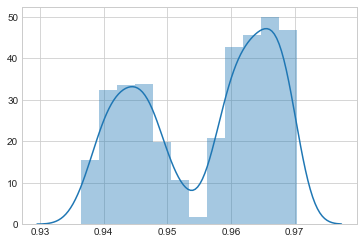

In [41]:
%%time
cut_mean_tta = mean_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [42]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [43]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.00019267262356363724s per sample

Predicting fold 2 out of 10
Prediction took 0.00019747749398180034s per sample

Predicting fold 3 out of 10
Prediction took 0.0001980609449454443s per sample

Predicting fold 4 out of 10
Prediction took 0.00020019499012728789s per sample

Predicting fold 5 out of 10
Prediction took 0.00019569740312726935s per sample

Predicting fold 6 out of 10
Prediction took 0.00019324260290906584s per sample

Predicting fold 7 out of 10
Prediction took 0.00019823945641817938s per sample

Predicting fold 8 out of 10
Prediction took 0.00019844290245452033s per sample

Predicting fold 9 out of 10
Prediction took 0.0001972989447636461s per sample

Predicting fold 10 out of 10
Prediction took 0.0002003527140908938s per sample

CPU times: user 2min 3s, sys: 13.3 s, total: 2min 16s
Wall time: 1min 48s


In [44]:
score_test_data(test_fy.source, cut_kde)

Public:Private AMS: 3.5911871496977037 : 3.720068022042411


(3.5911871496977037, 3.720068022042411)

In [45]:
score_test_data(test_fy.source, cut_mean)

Public:Private AMS: 3.78239332461915 : 3.781405273997953


(3.78239332461915, 3.781405273997953)

# Test scoring - With TTA

In [46]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), rotate=False,
                             input_pipe=None, rot_mult=8)

Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 4


In [47]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.000818588401272725s per sample

Predicting fold 2 out of 10
Prediction took 0.0008018418776363516s per sample

Predicting fold 3 out of 10
Prediction took 0.0007867809631454623s per sample

Predicting fold 4 out of 10
Prediction took 0.0007824198507636373s per sample

Predicting fold 5 out of 10
Prediction took 0.0007981497358181844s per sample

Predicting fold 6 out of 10
Prediction took 0.0008391931175454374s per sample

Predicting fold 7 out of 10
Prediction took 0.0008062929298727382s per sample

Predicting fold 8 out of 10
Prediction took 0.0008060583012363415s per sample

Predicting fold 9 out of 10
Prediction took 0.0008076476740363763s per sample

Predicting fold 10 out of 10
Prediction took 0.0008531927239272508s per sample

CPU times: user 8min 23s, sys: 51.4 s, total: 9min 14s
Wall time: 7min 25s


In [48]:
score_test_data(test_fy.source, cut_kde_tta, pred_name='pred_TTA')

Public:Private AMS: 3.609820491408031 : 3.726192837012599


(3.609820491408031, 3.726192837012599)

In [49]:
score_test_data(test_fy.source, cut_mean_tta, pred_name='pred_TTA')

Public:Private AMS: 3.7946865909824052 : 3.7957292804667264


(3.7946865909824052, 3.7957292804667264)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)